<a href="https://colab.research.google.com/github/cpacharya/Global-Terrorism/blob/main/EDA_project_on_Global_Terrorism_by_Chandra_Prakash_Acharya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Global Terrorism



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Chandra Prakash Acharya

# **Project Summary**

## ****The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.****

### "The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation." - Definition of Terrorism

### **Terrorist Activities Around The World**

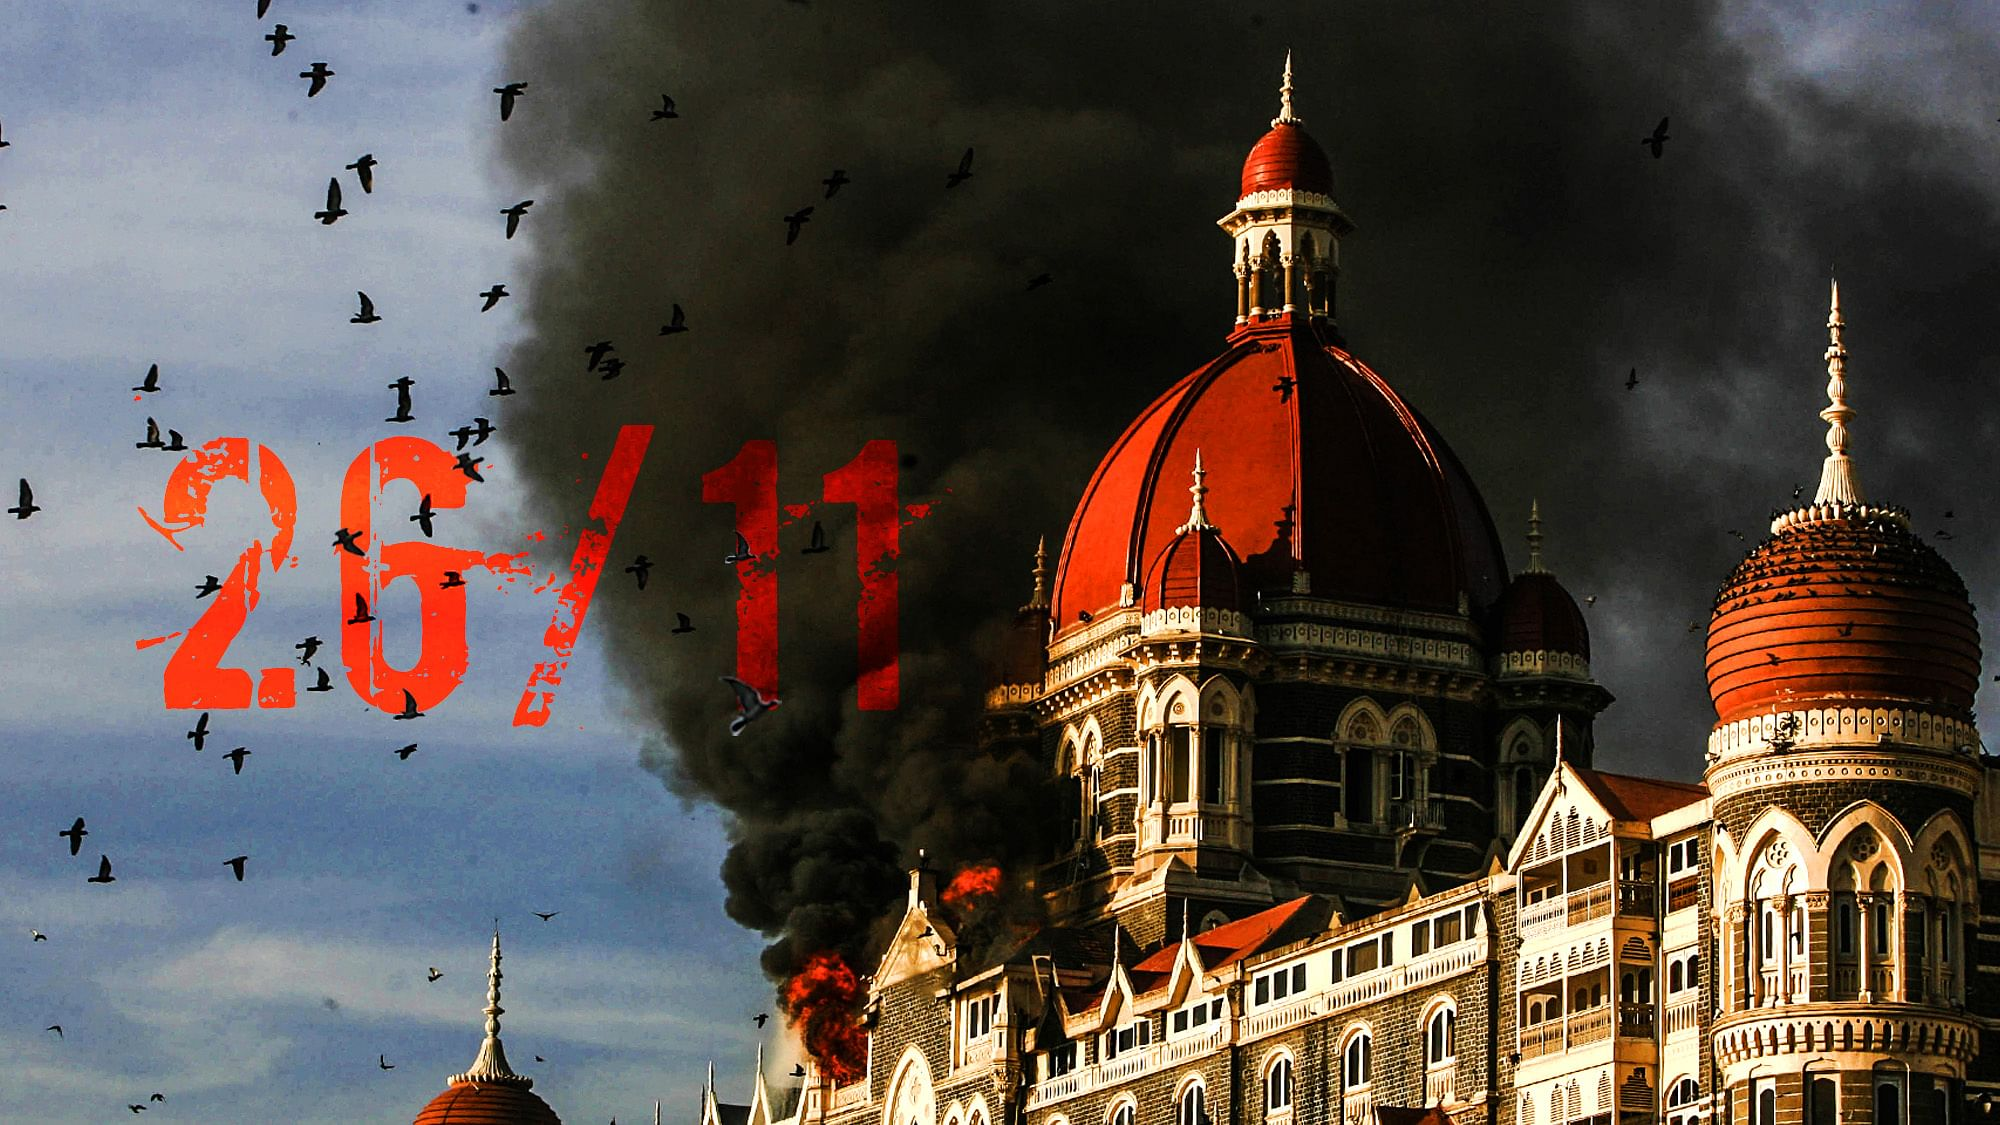

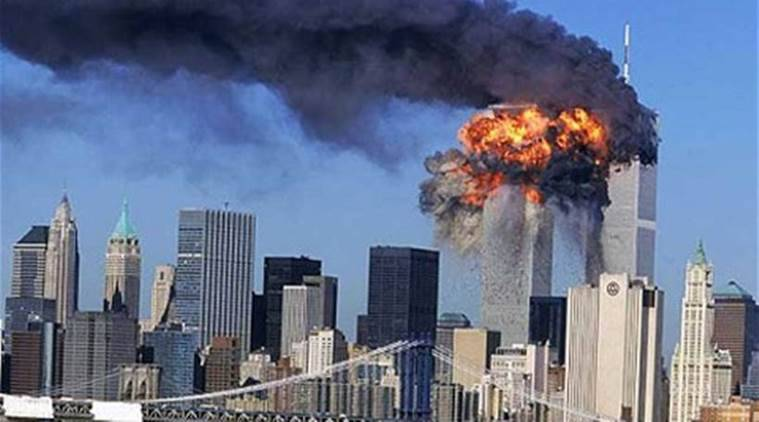

According to a survey, about 218 million people are affected by calamities, natural and man-made, per annum and about 68000 people loose their lives every year. The frequency of natural disasters like earthquakes, volcanoes etc have remained broadly constant, but the number of terrorist activities have grown over the period.

Terrorism implies the use of violence to terrorise a population or government for certain political, religious or ideological purpose. The threat of terrorism has become a worldwide concern with several parts of the world reeling under frequent terrorist strikes. With little concern for human lives, terrorists continue to strike with impunity, leaving a trail of death and destruction, wherever they choose to inflict their blows.

In this dataset, we will be exploring the terror attacks over the world from 1970-2017, finding the most affected countries, the most notorious groups, their motives,etc.

# **GitHub Link**

### **https://github.com/cpacharya/Global-Terrorism.git**

# **Problem Statement**


### How relevant are this concept and the details associated with it to the data we have will be the key question I want to address with this data exploration.

# **Let's Begin !**

### Import Libraries

In [76]:
# Import Libraries
# importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [50]:
# setting display options for dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
# reading file
df_global_terror = pd.read_csv(r"/content/drive/MyDrive/ALMABETTER/COHERT WARSAW /Project/Global Terrorism Data.csv", encoding='latin1')
df_global_terror.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows = len(df_global_terror.index)
print(rows)
columns = len(df_global_terror.columns)
print(columns)

181691
135


In [6]:
#Direct approach to show the no. of rows & columns in a tuple
df_global_terror.shape

(181691, 135)

In [72]:
#now we don't need all 135 columns, we'll just select the important ones
df_global_terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [73]:
df_global_terror = df_global_terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
               'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [54]:
df_global_terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
#Now we will see counts of columns in the revisited dataset 
revisited_columns = len(df_global_terror.columns)
print(revisited_columns)

17


### Dataset Information

In [55]:
# Dataset Info
df_global_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


#### Duplicate Values

In [56]:
# Dataset Duplicate Value Count
## Here we have count the duplicate values from a column
dup_value_count = df_global_terror.pivot_table(columns=['AttackType'], aggfunc='size')
print(dup_value_count)

AttackType
Armed Assault                          42669
Assassination                          19312
Bombing/Explosion                      88255
Facility/Infrastructure Attack         10356
Hijacking                                659
Hostage Taking (Barricade Incident)      991
Hostage Taking (Kidnapping)            11158
Unarmed Assault                         1015
Unknown                                 7276
dtype: int64


In [57]:
## Here we have count the duplicate values from multiple columns
dup_value_count = df_global_terror.pivot_table(columns=['AttackType', 'Target'], aggfunc='size')
print(dup_value_count)

AttackType     Target                               
Armed Assault  "Administration Post"                    1
               "Businessmen" Express, Cairo to Luxor    1
               "La Presna" (Opposition newspaper)       1
               "religious institution                   2
               #45 passenger and freight truck          1
                                                       ..
Unknown        white youth                              1
               willage of Luio                          1
               woman wearing miniskirt                  3
               wooden bridge                            1
               work crew                                1
Length: 91246, dtype: int64


#### Missing Values/Null Values

In [58]:
# Missing Values/Null Values Count
null_value_count = df_global_terror.isna().sum()
print(null_value_count)

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64


<AxesSubplot:>

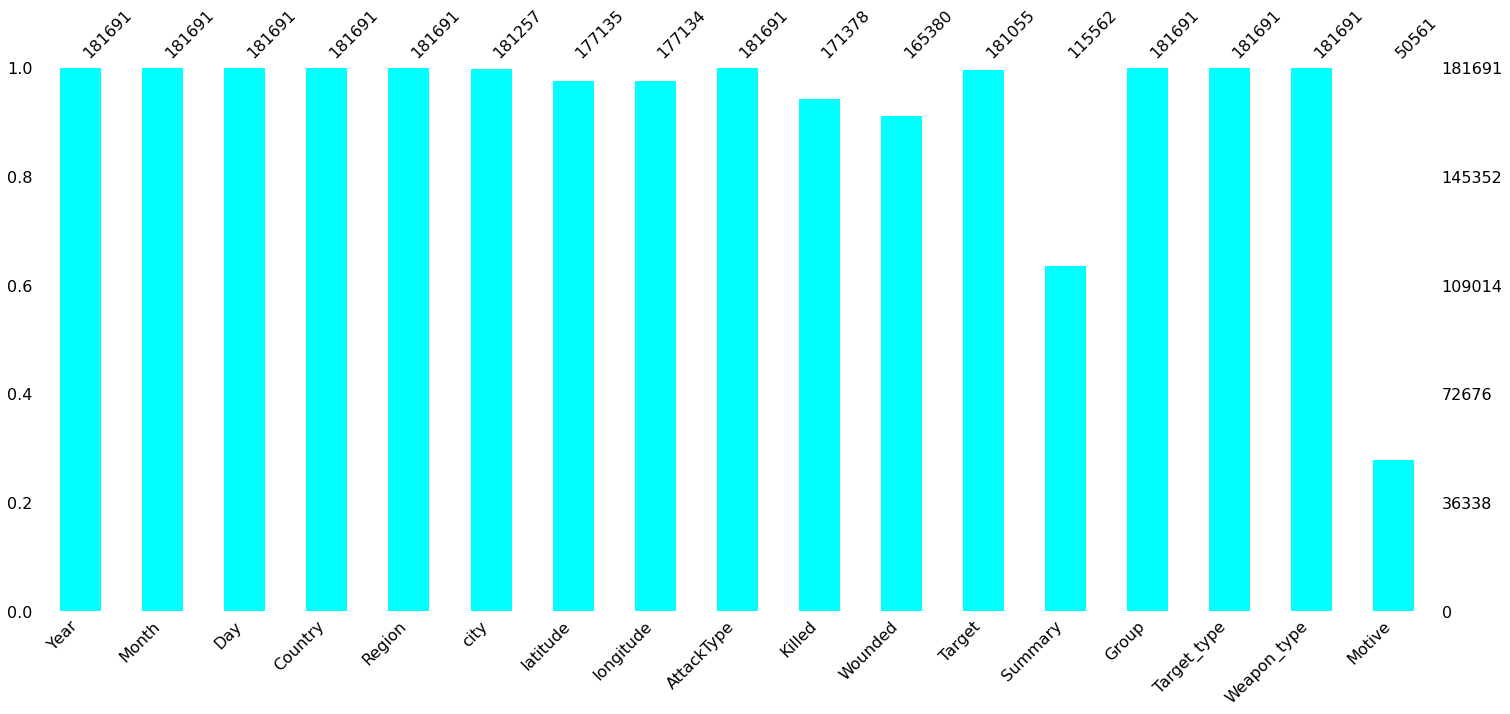

In [59]:
# Visualizing the missing values
msno.bar(df_global_terror, color = 'cyan')

### What did you know about your dataset?

### **As of now, we are working with a dataset of global terrorism, or data on incidents that have taken place all over the world. We are here to analyse the provided data, and through analysis, we will produce some insights about those incidents and visualise them so that the user can clearly understand how and where precisely the terrorists have attacked the most frequently, as well as which cities or nations are actually at risk.**

## ***2. Understanding Your Variables***

In [60]:
# Dataset Columns
d_columns = df_global_terror.columns
print(d_columns)

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'], dtype='object')


In [61]:
# Dataset Describe
d_describe = df_global_terror.describe()
d_describe

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


### Variables Description 

1.   **Year** - Shows terrorist attacks around the world from 1970 through 2017
2.   **Month** - It shows the number of month in the calender year when the attack happened
3. **Day** - It tells the exact day number in the month of the attack
4. **Country** - The nation in which the attack took place
5. **Region** - The region in the particular country where the the attack happened
6. **city** - Name of the particular city where the attack happened.
7. **latitude** - Shows the coordinates of the attack in latitude
8. **longitute** - Shows the coordinates of the attack in longitude
9. **AttackType** - It gives the type of the attack that took place
10. **Killed** - No. of people died in the attack
11. **Wound** -  no. of people that got injured 
12. **Target** - Name of the actual target behind the attack.
13. **Summary** - Describes about the post calamity happened after the attack
14. **Group** - The name of the terrorist groups
15. **Target_type** - The type of the attack.
16. **Weapon_type** - The type of weapon they used for the attack.
17. **Motive** - The reason behind the attack

### Check Unique Values for each variable.

In [46]:
# Check Unique Values for each variable.
d_columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'], dtype='object')

## 3. ***Data Wrangling***

### Data Wrangling Code

In [62]:
# Write your code to make your dataset analysis ready.
#Finding the Country with Highest Terrorist Attacks
df_global_terror['Country'].value_counts().index[0]

'Iraq'

In [22]:
#Showing the Regions in from Highest to lowest no. of Terrorist Attacks
df_global_terror['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [23]:
#Finding out the maximum number of people died in a single attack and the country where that took place
max_people_died = df_global_terror['Killed'].max()
print(max_people_died)
country_max_people_died = df_global_terror.loc[df_global_terror['Killed'].idxmax()].Country
print(country_max_people_died)

1570.0
Iraq


In [24]:
#Finding out the City with the most no.of attackes happened by the terrorists
df_global_terror['city'].value_counts().index[1]

'Baghdad'

In [25]:
#Printing out the year and month with the most no.of attackes happened
horrific_year = df_global_terror['Year'].value_counts().idxmax()
print(horrific_year)

horrific_month = df_global_terror['Month'].value_counts().idxmax()
print(horrific_month)

2014
5


In [26]:
#Finding out the terrorist group who caused the most destruction around the world
df_global_terror['Group'].value_counts().index[1]

'Taliban'

In [63]:
#Finding out the most no.of attack type that happened
df_global_terror['AttackType'].value_counts().idxmax()

'Bombing/Explosion'

### What all manipulations have you done and insights you found?

We did some research about the most no. of things that happened by the terrorists. From the research we get to find the following insights:


1.   Country with Highest Terrorist Attacks: **Iraq**
2.   Regions with Highest Terrorist Attacks: **Middle East & North Africa**
3.   Maximum people killed in an attack: **1570.0**
4.   City with the most attacks: **Baghdad**
5.   Year with the most attacks: **2014**
6.   Month with the most attacks: **5**
7.   Group with the most attacks: **Taliban**
8.   Most Attack Types: **Bombing/Explosion**



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


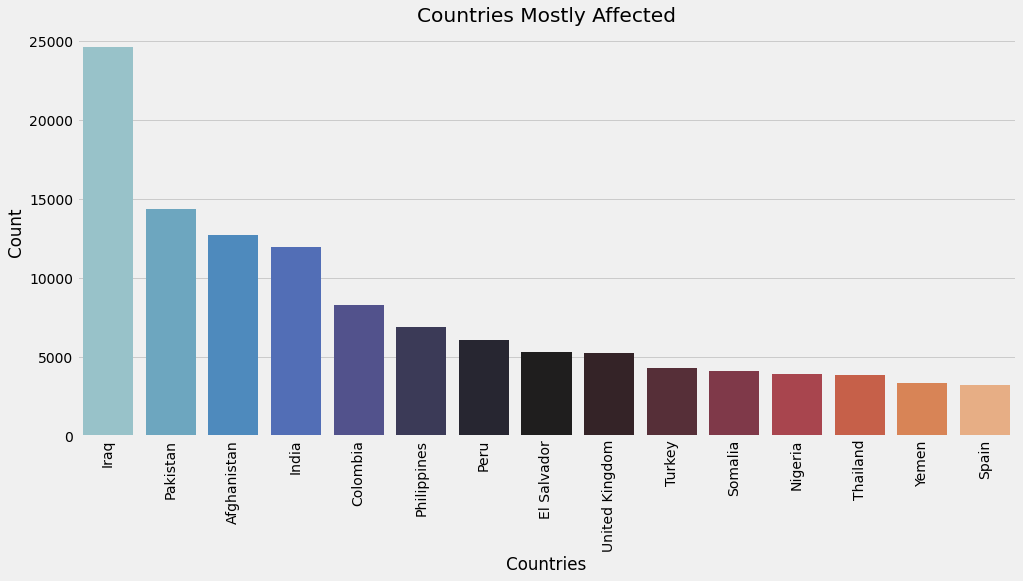

In [85]:
# Chart - 1 visualization code
# This chart is used to show the top countries which are mostly affected by terrorism
plt.subplots(figsize=(15,7))
countries_affected_most = df_global_terror['Country'].value_counts()[:10]
countries_affected_most.columns = ['Country', 'Count']
sns.barplot(df_global_terror['Country'].value_counts()[:15].index,df_global_terror['Country'].value_counts()[:15].values,palette='icefire')
plt.title('Countries Mostly Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

##### 1. Why did you pick the specific chart?

I have used here the Bar Chart to show specifically the most affected countries by terrorism because by this chart we could easily compare among discrete countries.

##### 2. What is/are the insight(s) found from the chart?

The most affected country by terrorism is Iraq. Followed by Pakistan & Afghanistan

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


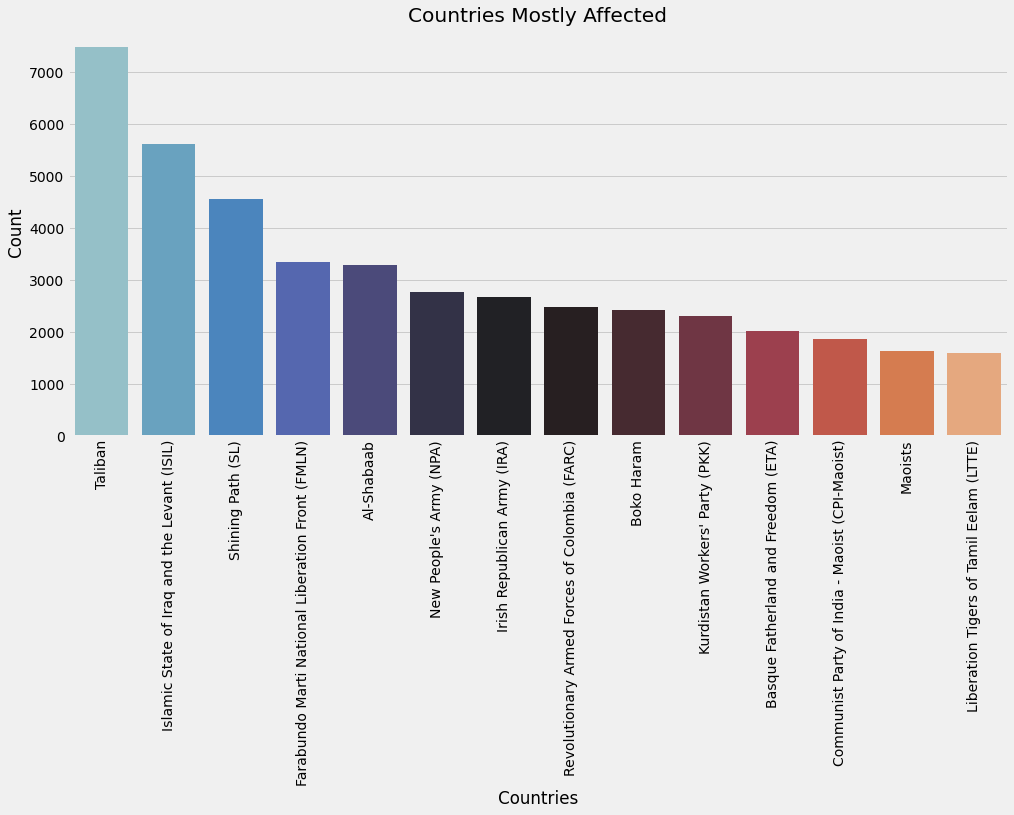

In [87]:
# Chart - 2 visualization code
plt.subplots(figsize=(15,7))
countries_affected_most = df_global_terror['Group'].value_counts()[:10]
countries_affected_most.columns = ['Group', 'Count']
sns.barplot(df_global_terror['Group'].value_counts()[1:15].index,df_global_terror['Group'].value_counts()[1:15].values,palette='icefire')
plt.title('Countries Mostly Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

Text(0.5, 0, 'Attack Type')

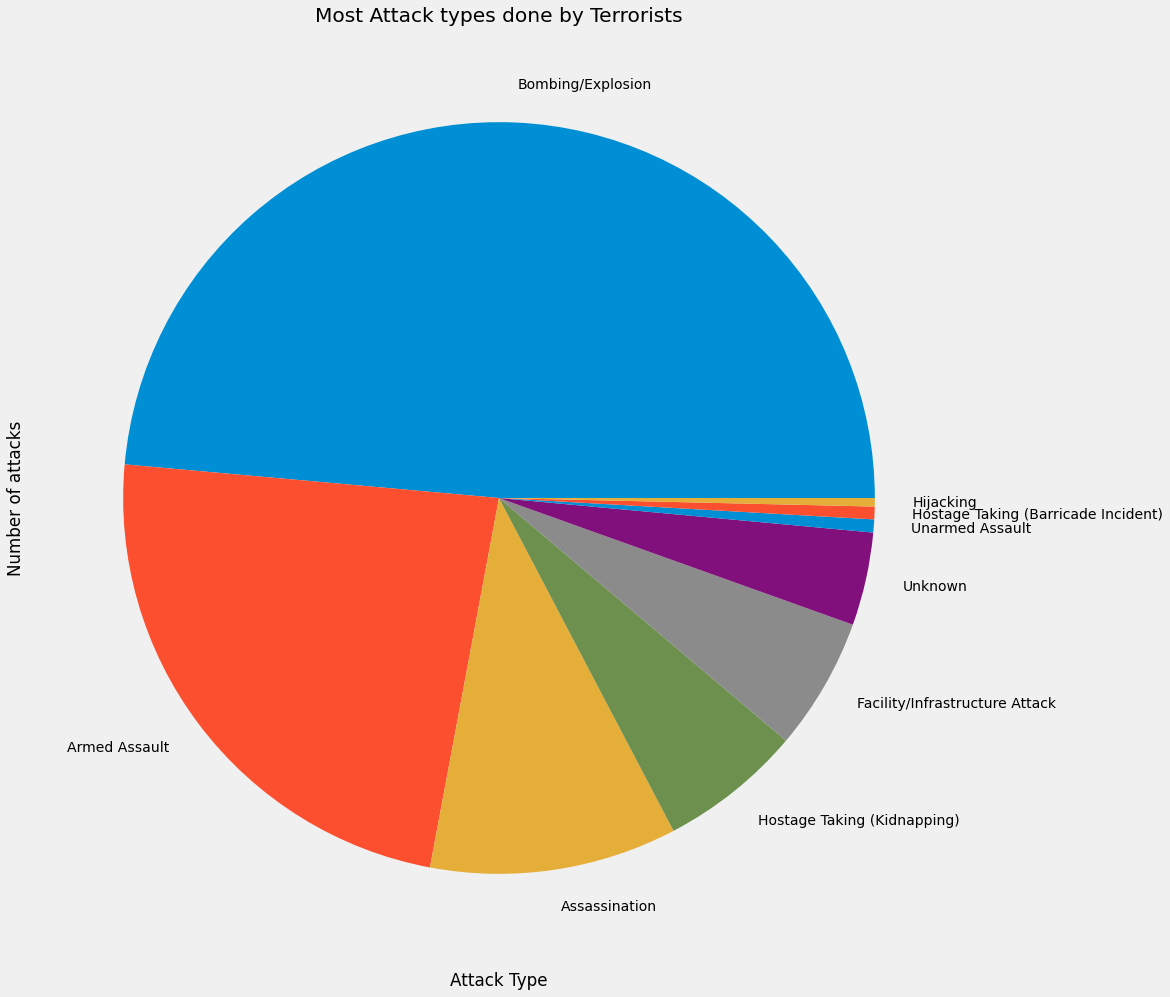

In [97]:
# Chart - 3 visualization code
# This chart shows the count of most destructive types of attack that happened during the course of years till 2017
attack_type = df_global_terror["AttackType"].value_counts()
#print(attack_type)

plt.subplots(figsize=(15,17))
attack_type.plot(kind='pie')

plt.title('Most Attack types done by Terrorists')
plt.ylabel('Number of attacks')
plt.xlabel('Attack Type')

##### 1. Why did you pick the specific chart?

I picked Pie chart for this because to show a rough view of the way of the attacks that happened mostly. Since, the types of Attack is less so, it is wise to use a pie chart for that.

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that the most attack that happened over the time is by Bombing or Explosion.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***